aVề phần thống kê này sẽ tập trung vào 4 điểm chính trong lĩnh vực tài chính 
1,Normality Tests (Kiểm tra phân phối chuẩn) 
    -Do các mô hình tài chính quan trọng dựa trên giả định rằng lợi nhuận của các tài sản tuân theo phân phối chuẩn, việc kiểm tra dữ liệu thực tế để xác định liệu chúng có tuân theo phân phối chuẩn hay không là rất quan trọng. Nếu dữ liệu không tuân theo phân phối chuẩn, các mô hình tài chính có thể không hoạt động chính xác hoặc dẫn đến kết luận sai lầm.
    -Giả định phân phối chuẩn: Các mô hình tài chính quan trọng như MPT và CAPM dựa vào giả định rằng lợi nhuận tài chính tuân theo phân phối chuẩn.
    -Tầm quan trọng của việc kiểm tra: Để đảm bảo rằng các mô hình tài chính này được áp dụng đúng cách, cần phải kiểm tra dữ liệu thực tế xem có tuân theo phân phối chuẩn không.
    -Nội dung của chương: Chương này sẽ giới thiệu các phương pháp kiểm tra tính chuẩn của lợi nhuận trong dữ liệu thời gian (time series), để xác định xem dữ liệu thực tế có phù hợp với giả định phân phối chuẩn hay không.
2,Portoflio Optimization (tối ưu hóa danh mục đầu tư) 
    -Modern Portfolio Theory (MPT) đã đem lại sự đổi mới trong lĩnh vực tài chính, thay thế các phương pháp đầu tư dựa trên cảm tính và kinh nghiệm bằng các phương pháp phân tích định lượng chính xác hơn. MPT, bắt đầu từ công trình của Harry Markowitz vào những năm 1950, là một trong những bước đột phá lớn nhất trong việc áp dụng thống kê và toán học vào quản lý danh mục đầu tư và được coi là mô hình định lượng đầu tiên trong tài chính
3,Bayesian Statistics (Thống kê bayes)
    - thống kê Bayes là một cách tiếp cận trong phân tích dữ liệu, trong đó niềm tin của các tác nhân được cập nhật dựa trên dữ liệu mới thông qua việc sử dụng phân phối xác suất cho các tham số. Trong hồi quy tuyến tính, phương pháp Bayes cung cấp phân phối xác suất cho các tham số thay vì chỉ ước lượng điểm. Các phương pháp Bayes hiện được sử dụng rộng rãi trong tài chính, và phần này sẽ cung cấp ví dụ minh họa cách áp dụng chúng trong lĩnh vực này.
4,Machine Learning
    - Machine Learning, nhấn mạnh rằng nó là một lĩnh vực con của trí tuệ nhân tạo và dựa trên các phương pháp thống kê. Học máy cung cấp các phương pháp để học từ dữ liệu và tạo ra dự đoán, với các thuật toán có thể thuộc loại học có giám sát hoặc học không có giám sát. Câu văn cũng cho biết rằng chương này sẽ cung cấp các ví dụ về học có giám sát cho phân loại.

---------------------------Normality Tests----------------


[100.          97.8209674   98.5572741  106.15460369 105.89900781
  99.83634046 100.01448332 102.65885067 105.66428478 107.11072761
 108.79428909 108.24494471 106.41048513 101.05747898 102.01969882
 102.60523925 109.64191477 109.57251039 112.97662988 113.0224732
 112.54764269 114.55846128 109.94201828 112.62713441 112.75022573
 116.34534042 115.04433036 113.9585812  115.88312153 117.37054762
 117.91852147 110.55387429 109.96871001 104.99568503 108.06788447
 105.78224274 105.15845219 104.33043315 108.43870797 105.59634993
 108.86597562 108.32844142 107.00769072 106.00339557 104.39639778
 101.06368908  98.37763147  97.13499019  95.4254465   96.42713067
  96.33862377]
     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


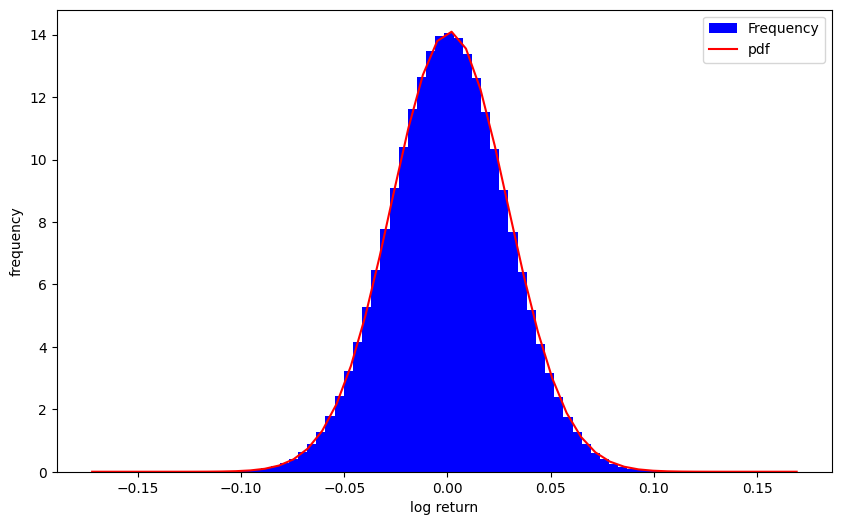

In [3]:
# -----------------Benchmark Case------------------
# Hàm gen_paths tạo ra một số lượng các đường đi giả lập cho mô hình GBM, sử dụng các tham số đầu vào như giá trị ban đầu, lãi suất, độ biến động, 
# thời gian, số bước thời gian, và số lượng đường đi. Các đường đi này có thể được sử dụng để phân tích, mô phỏng hoặc định giá các tài sản tài chính 
# trong các mô hình tài chính.
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl,plt
def print_statistics(array):
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    Parameters
    ==========
    S0: float
    initial stock/index value
    r: float
    constant short rate
    sigma: float
    constant volatility
    T: float
    final time horizon
    M: int
    number of time steps/intervals
    I: int
    number of paths to be simulated
    Returns
    =======
    paths: ndarray, shape (M + 1, I)
    simulated paths given the parameters
    '''
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std() 
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
        sigma * math.sqrt(dt) * rand) 
    return paths
S0 = 100. 
r = 0.05 
sigma = 0.2 
T = 1.0 
M = 50 
I = 250000 
np.random.seed(1000)
paths = gen_paths(S0, r, sigma, T, M, I)
# xem 1 đường đi giả lập 
print(paths[:,0])

# paths[1:]: Lấy tất cả các hàng từ hàng thứ hai (chỉ số 1) đến hàng cuối cùng của mảng paths. Đây là các giá trị tài sản từ thời điểm thứ hai trở đi.
# paths[:-1]: Lấy tất cả các hàng từ hàng đầu tiên (chỉ số 0) đến hàng trước hàng cuối cùng của mảng paths. 
# Đây là các giá trị tài sản từ thời điểm đầu tiên đến trước thời điểm cuối cùng.
# Khi chia paths[1:] / paths[:-1], ta tính được tỷ lệ giữa giá trị tài sản tại thời điểm t với giá trị
#  tại thời điểm t-1, tức là tỷ lệ thay đổi giá trị qua từng bước thời gian. Con np.log() là tính log tự nhiên, ta tính được tỷ suất sinh lợi logarit
log_returns = np.log(paths[1:] / paths[:-1])
log_returns[:,0].round(4)
print_statistics(log_returns.flatten())
plt.figure(figsize=(10,6))
plt.hist(log_returns.flatten(),bins = 70,
         density=True,
         label = 'Frequency',
         color= 'b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,scs.norm.pdf(x,loc = r/M,scale = sigma/np.sqrt(M)),'r',label = 'pdf')
plt.legend()


# Real world Data
Ở phần này, ta sẽ tập trung phân tích 4 lịch sử tài chính, 2 cho nhãn hàng công nghệ và 2 cho quỹ trao đổi(ETFs)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     1972 non-null   float64
 1   GLD     1972 non-null   float64
 2   AAPL.O  1972 non-null   float64
 3   MSFT.O  1972 non-null   float64
dtypes: float64(4)
memory usage: 77.0 KB


<Axes: xlabel='Date'>

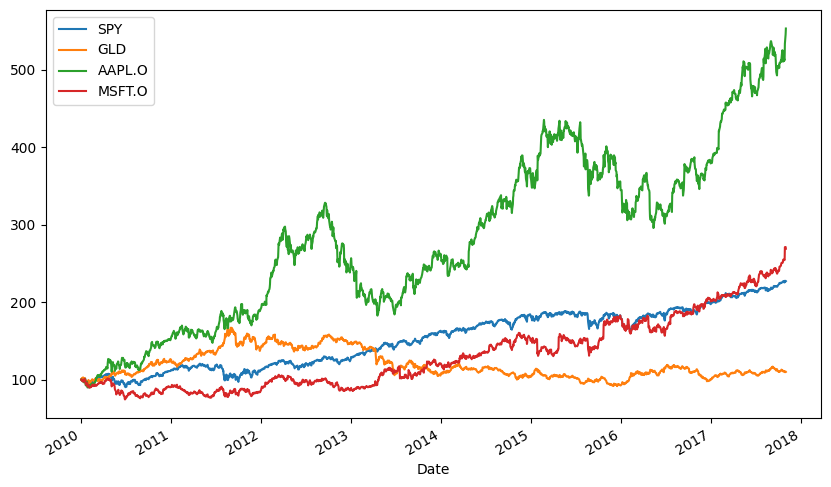

In [4]:
import pandas as pd
raw = pd.read_csv('/home/quoc/works/FinanceLearn/data/tr_eikon_eod_data.csv',index_col=0, parse_dates = True).dropna()
symbols = ['SPY','GLD','AAPL.O','MSFT.O']
data = raw[symbols]
data = data.dropna() 
data.info()
# Xem biểu đồ phần tăm tăng trưởng so với mức khởi điểm là 100%

(data / data.iloc[0] * 100).plot(figsize=(10, 6))

array([[<Axes: title={'center': 'SPY'}>, <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'MSFT.O'}>]], dtype=object)

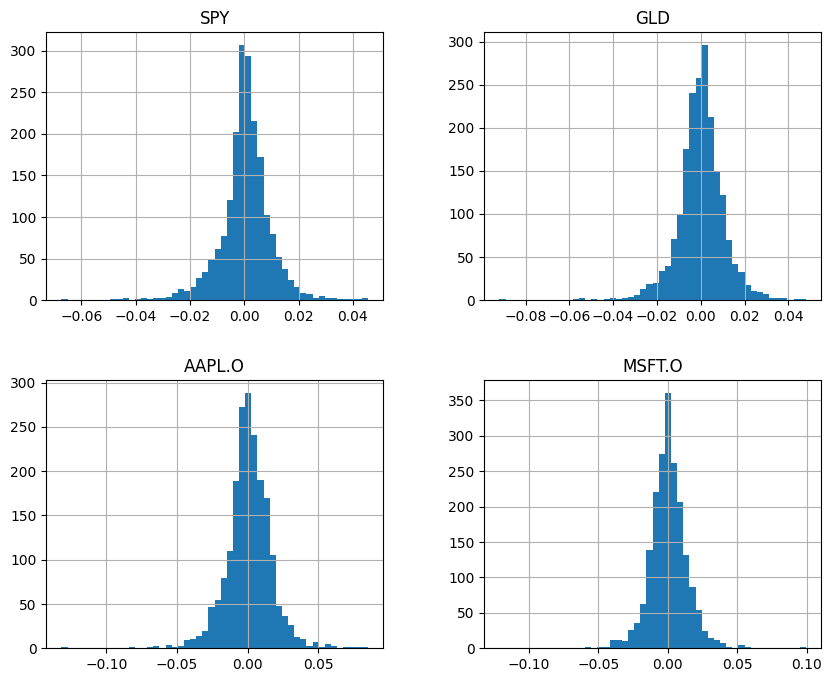

In [5]:
# Xem biểu đồ tỉ lệ sinh lời log 
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50, figsize=(10, 8))

### Nhận xét về biểu đồ trên :
#### 1.Phân phối của tỷ lệ sinh lời logarit:

- Hầu hết các tỷ lệ sinh lời đều gần với 0, điều này có nghĩa là trong hầu hết các ngày, giá của tài sản không thay đổi quá nhiều.
Những giá trị ngoại biên (xa giá trị 0) là những lần giá biến động mạnh hơn, cho thấy sự tăng hoặc giảm đột biến.

#### 2.Độ bất đối xứng (skewness):

- Nhìn vào các biểu đồ, có thể nhận thấy một số tài sản có phân phối lệch về một phía. Ví dụ:
Với GLD (vàng), phân phối dường như hơi lệch sang bên trái (lỗ thường xuyên hơn lời), trong khi các tài sản như AAPL.O và MSFT.O có phân phối gần đối xứng hơn.
Điều này có thể cho thấy rằng một số tài sản có nhiều ngày thua lỗ hơn (hoặc tăng trưởng ít hơn) so với ngày tăng trưởng.

#### 3.Độ biến động (volatility):

- Độ rộng của biểu đồ cho biết độ biến động của tài sản. Các biểu đồ rộng hơn (kéo dài hơn) cho thấy mức biến động cao hơn (giá thay đổi mạnh hơn).
Ví dụ, nếu biểu đồ của một tài sản có độ rộng lớn hơn, điều đó có nghĩa là giá của nó có thể thay đổi mạnh hơn so với một tài sản khác có biểu đồ hẹp.
#### 4.Tỷ lệ lợi nhuận thường gặp:

- Các đỉnh của biểu đồ (vị trí có nhiều tần suất nhất) thể hiện tỷ lệ sinh lời phổ biến nhất. Đối với các cổ phiếu như AAPL.O hay MSFT.O, có thể thấy tỷ lệ sinh lời logarit phổ biến nhất nằm quanh giá trị 0, cho thấy giá thường không thay đổi nhiều mỗi ngày.

## Kết luận:
Biểu đồ này cho bạn cái nhìn trực quan về phân phối tần suất của tỷ lệ sinh lời logarit cho mỗi tài sản, giúp bạn hiểu rõ hơn về:

Mức độ biến động (volatility) của từng tài sản.
Xu hướng giá của các tài sản (lỗ hay lãi phổ biến hơn).
Độ lệch và phân phối của tỷ lệ sinh lời (asymmetry trong phân phối tỷ lệ sinh lời).
Biểu đồ phân phối tần suất có thể giúp bạn đánh giá rủi ro và tiềm năng lợi nhuận của các tài sản, qua đó đưa ra các quyết định đầu tư phù hợp hơn.

## Chú ý thêm định nghĩa về giá trị kurtosis và skewness :
### Về skewness: 
- Skewness âm :
    - Khi phân phối dữ liệu có skewness âm, đuôi bên trái (phía thấp hơn) của phân phối kéo dài dài hơn đuôi bên phải. Điều này có nghĩa là phần lớn dữ liệu tập trung ở phía bên phải của phân phối, và có một số giá trị nhỏ hơn đáng kể kéo dài về phía bên trái.
- Skewness dương: 
    - Khi phân phối dữ liệu có skewness dương, đuôi bên phải (phía cao hơn) của phân phối kéo dài dài hơn đuôi bên trái. Điều này có nghĩa là phần lớn dữ liệu tập trung ở phía bên trái của phân phối, và có một số giá trị cao hơn đáng kể kéo dài về phía bên phải.
###  Về Kurtosis:
- Kurtosis (độ nhọn của phân phối) là một thước đo thống kê thể hiện sự "nhọn" hoặc độ "phẳng" của một phân phối xác suất so với phân phối chuẩn (normal distribution). Nó cho biết mức độ tập trung của các giá trị xung quanh giá trị trung bình và sự xuất hiện của các giá trị cực đoan (các điểm dữ liệu xa giá trị trung bình).
- Các loại Kurtosis:
    - Giá trị kurtosis > 0. Phân phối có đỉnh cao hơn và "đuôi dày" hơn so với phân phối chuẩn. Điều này có nghĩa là có nhiều giá trị dữ liệu tập trung xung quanh giá trị trung bình, nhưng cũng có nhiều giá trị cực đoan (outliers) ở hai bên.
    Ví dụ: Trong trường hợp của một thị trường tài chính, phân phối lợi nhuận có độ kurtosis dương thường có nghĩa là có nhiều ngày giá biến động mạnh (lãi hoặc lỗ lớn).
    - Giá trị Kurotis = 0. Phân phối giống với phân phối chuẩn. Đỉnh và đuôi có độ "dày" tương tự phân phối chuẩn.
    - Giá trị Kuritis < 0. Phân phối có đỉnh thấp và đuôi mỏng hơn so với phân phối chuẩn, cho thấy các giá trị nằm xa trung bình ít xảy ra hơn. Điều này có nghĩa là các giá trị cực đoan ít hơn và phân phối có xu hướng "phẳng" hơn.
- Ý nghĩa :
    - Kurtosis dương: Khi lợi nhuận của một cổ phiếu hoặc tài sản có kurtosis dương, điều này có nghĩa là biến động lớn hơn bình thường có thể xảy ra (tức là có nhiều ngày với mức lợi nhuận hoặc thua lỗ cực đoan).
    - Ngược lại, khi lợi nhuận có kurtosis âm, có nghĩa là biến động thấp hơn và giá cổ phiếu có xu hướng thay đổi ổn định hơn.
- Krutosis và skewness :
    - Kurtosis dương và skewness âm: Có thể cho thấy rằng rủi ro của việc thua lỗ lớn hơn là cơ hội có lợi nhuận lớn.
    - Kurtosis dương và skewness dương: Có thể chỉ ra rằng có tiềm năng đạt lợi nhuận lớn, nhưng cũng đi kèm với khả năng thua lỗ lớn.

In [6]:
# Xem bảng dữ liệu tỉ lệ lợi nhuận log
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      1971.00000
           min        -0.06734
           max         0.04545
          mean         0.00042
           std         0.00934
          skew        -0.46886
      kurtosis         4.54265

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      1971.00000
           min        -0.09191
           max         0.04795
          mean         0.00005
           std         0.01048
          skew        -0.60078
      kurtosis         5.42113

Results for symbol AAPL.O
------------------------------
     statistic           value
------------------------------
          size      1971.00000
           min        -0.13187
           max         0.08502
          mean         0.00087
           std         0.01605
          skew        -0.26179
      kurtosis         4.9

# Portfolio Optimization
-  <i> <b> <i>Portfolio Optimization </i> </b> (tối ưu hóa danh mục đầu tư) là quá trình lựa chọn tỷ lệ phân bổ vốn vào các tài sản khác nhau trong một danh mục đầu tư nhằm đạt được một mục tiêu cụ thể, chẳng hạn như tối đa hóa lợi nhuận kỳ vọng hoặc tối thiểu hóa rủi ro, tùy thuộc vào các giới hạn và ràng buộc nhất định.

- Mục tiêu chính của tối ưu hóa danh mục đầu tư là đạt được sự cân bằng tốt nhất giữa rủi ro và lợi nhuận. Một trong những phương pháp phổ biến nhất để thực hiện tối ưu hóa là Lý thuyết danh mục đầu tư hiện đại (Modern Portfolio Theory - MPT) của Harry Markowitz. Theo lý thuyết này, danh mục đầu tư hiệu quả sẽ nằm trên đường gọi là đường biên hiệu quả (Efficient Frontier), nơi mà mức lợi nhuận kỳ vọng cao nhất được đạt với mức rủi ro cho phép.

- Lý thuyết danh mục đầu tư hiện đại hoặc lý thuyết phương sai-trung bình là một nền tảng quan trọng của lý thuyết tài chính. Dựa trên đột phá lý thuyết này, giải Nobel Kinh tế đã được trao cho người sáng lập ra nó, Harry Markowitz, vào năm 1990. Mặc dù được xây dựng vào những năm 1950, lý thuyết này vẫn được giảng dạy cho sinh viên tài chính và được áp dụng trong thực tiễn ngày nay (thường có một số sửa đổi nhỏ hoặc lớn).

## The Data

- <i>Ý tưởng cơ bản của Lý thuyết danh mục đầu tư hiện đại (MPT) là sử dụng "sự đa dạng hóa" để đạt được rủi ro danh mục thấp nhất với một mức lợi nhuận mục tiêu hoặc đạt lợi nhuận danh mục cao nhất với một mức rủi ro nhất định. Người ta có thể mong đợi những hiệu ứng đa dạng hóa này khi có sự kết hợp hợp lý của một số lượng lớn tài sản và sự đa dạng nhất định trong các tài sản..<i>

- $\Rightarrow $ Hiểu nôm na là thay vì đầu tư một lĩnh vực có rủi ro thì nên đầu tư nhiều lĩnh vực để tối ưu hóa lợi nhuận cũng như giảm thiểu rủi ro
- Trong phần này sẽ ví dụ cho 4 dạng dữ liệu.


array([[<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'MSFT.O'}>],
       [<Axes: title={'center': 'SPY'}>, <Axes: title={'center': 'GLD'}>]],
      dtype=object)

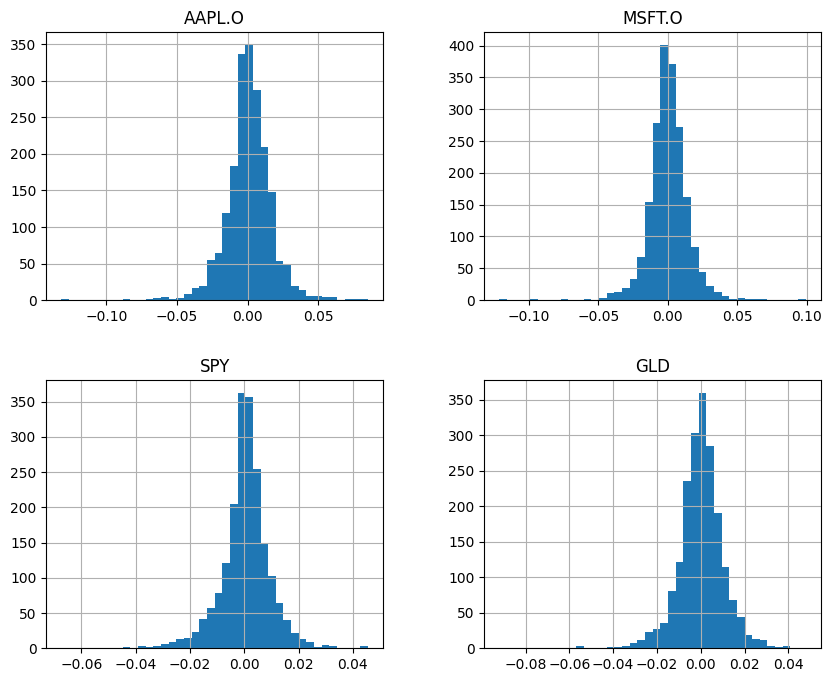

In [7]:
import numpy as np
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD']  
noa = len(symbols)  
data = raw[symbols]
rets = np.log(data / data.shift(1))
rets.hist(bins=40, figsize=(10, 8))

- <i>Trong quá trình lựa chọn danh mục đầu tư, ma trận hiệp phương sai của các công cụ là yếu tố trung tâm. Ma trận này giúp xác định mối quan hệ giữa các tài sản, bao gồm mức độ mà các tài sản di chuyển cùng nhau (hoặc ngược chiều nhau). Việc tính toán ma trận hiệp phương sai là rất quan trọng trong việc xác định phân bổ tối ưu của các tài sản để giảm thiểu rủi ro tổng thể của danh mục.
<br></br>
- <b> <i> Nhắc lại một chút về hiệp phương sai </i> </b>:
Hiệp phương sai là đo lường mối quan hệ có hướng giữa lợi nhuận trên hai tài sản. Ví dụ như lợi nhuận của cổ phiếu N tăng khi lợi nhuận của cổ phiếu M tăng và cũng có hiện tượng này cũng xảy ra khi giá cổ phiếu giảm thì cổ phiếu N và M có hiệp phương sai dương.
<br></br>
- <b> <i> Ma trận hiệp phương sai: </i> </b>
Một ma trận hiệp phương sai, trong đó mỗi phần tử tại hàng i và cột j đại diện cho hiệp phương sai giữa tài sản i và tài sản j. Ma trận này rất quan trọng trong việc đánh giá rủi ro của danh mục đầu tư vì nó giúp xác định mối tương quan giữa các tài sản khác nhau. 

In [8]:
rets.mean()

AAPL.O    0.000868
MSFT.O    0.000502
SPY       0.000416
GLD       0.000048
dtype: float64

In [9]:
# Ma trận hiệp phương sai
rets.cov()

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.000258,0.000089,8.294792e-05,5.993462e-06
MSFT.O,0.000089,0.000199,8.574707e-05,-1.690701e-06
SPY,0.000083,0.000086,8.724580e-05,9.183375e-09
GLD,0.000006,-0.000002,9.183375e-09,1.097847e-04


# The Basic Theory


- Giả sử một nhà đầu tư chỉ được phép đầu tư dài hạn (long positions) vào các công cụ tài chính, tức là 100% tài sản phải được phân bổ vào các công cụ này sao cho tất cả các vị trí đều dương và tổng cộng bằng 100%. Ví dụ, nếu có bốn công cụ, có thể đầu tư đều vào mỗi công cụ—tức là 25% tài sản vào mỗi công cụ. Đoạn mã sau đây tạo ra bốn số ngẫu nhiên phân phối đồng đều giữa 0 và 1, sau đó chuẩn hóa các giá trị sao cho tổng của chúng bằng 1.

In [10]:
weights = np.random.random(noa)
print(weights)
weights /= np.sum(weights)
weights

[0.05479051 0.04312583 0.4537813  0.16444993]


array([0.07650728, 0.06021919, 0.63364218, 0.22963135])

- Cách tính toán lợi nhuận kỳ vọng của danh mục đầu tư dựa trên trọng số của các công cụ:
    - Tổng trọng số của các công cụ tchinh là 1, nghĩa là tổng các $W_i$ bằng 1 và mỗi trọng số $W_i$ \> 0
    - Lợi nhuận kỳ vọng được tính dựa trên giả định rằng hiệu suất trung bình lịch sử là dự đoán tốt nhất cho hiệu suất tương lai.
    - Trong đó $r_i$ là lợi nhuận tương lai phụ thuộc vào trạng thái của công cụ tài chính, và  $u_i$ là lợi nhuận kì vọng của công cụ tài chính i
    - $W^t$ là ma trận chuyển vị của vector trọng số, và $u$ là vector chứa các lợi nhuận kỳ vọng của công cụ tài chính
$$
\mu_p = E\left(\sum_i w_i r_i\right)
    = \sum_i w_i E(r_i)
    =\sum_i w_i \mu_i =w^T \mu
$$

In [11]:
# Code
print(np.sum(rets.mean() * weights) * 252) 
# 252 là số ngày giao dịch trong một năm, nhân vào để tính đươc lợi nhuận kì vọng hằng năm


0.09348922407789446


- Một điều quan trọng khác của MPT là <b> <i> Phương sai kì vọng của danh mục đầu tư </i> </b>. Hiệp phương sai giữa hai chứng khoán được định nghĩa là $\sigma_{ij} = \sigma_{ji} = E[(r_i - \mu_i)(r_j - \mu_j)]$. Phương sai của một chứng khoán là trường hợp đặc biệt của hiệp phương sai với chính nó: $\sigma_i^2 = E((r_i - \mu_i)^2)$
- Công thức chung tính phương sai kì vọng: $\sigma_p^2 = E[(r - \mu)^2] = \sum_{i \in I} \sum_{j \in I} w_i w_j \sigma_{ij} = \mathbf{w}^T . (\Sigma . \mathbf{w})$

In [12]:
# Code
# -----Phương sai kì vọng của danh mục------
print(np.dot(weights.T, np.dot(rets.cov() *252, weights)))
# -----Độ lệch chuẩn--------
print(math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))) )

0.014773304718960326
0.12154548415700324


- <b> <i> Các ví dụ, định nghĩa trên chủ yếu hoàn thiện bộ công cụ cho việc lựa chọn danh mục đầu tư theo phương pháp phương sai - kỳ vọng. Mối quan tâm hàng đầu của các nhà đầu tư là các cấu hình rủi ro - lợi nhuận nào có thể đạt được cho một tập hợp các công cụ tài chính nhất định và các đặc tính thống kê của chúng. Để đạt được mục tiêu này, đoạn mã dưới đây triển khai một mô phỏng Monte Carlo (xem Chương 12) để tạo ra các vector trọng số danh mục ngẫu nhiên ở quy mô lớn hơn. Đối với mỗi phân bổ được mô phỏng, mã ghi lại lợi nhuận kỳ vọng và phương sai của danh mục đầu tư. Để đơn giản hóa mã, hai hàm, port_ret() và port_vol(), được định nghĩa <i> <b>


- <b>Giari thích code</b> :
    - Hàm port_ret là để tính lợi nhuận kì vọng hằng năm
    - Hàm port_val là để tính độ biến động kì vọng hằng năm
    - Vòng lặp này sẽ chạy 2500 lần, mỗi lần tạo ra một bộ trọng số ngẫu nhiên cho các tài sản trong danh mục (weights = np.random.random(noa)).
    - Sau đó, các trọng số này được chuẩn hóa để tổng cộng lại thành 1 (weights /= np.sum(weights)).
    - Với mỗi bộ trọng số, tính lợi nhuận kỳ vọng (port_ret(weights)) và độ biến động kỳ vọng (port_vol(weights)), và lưu chúng vào các danh sách prets và pvols.

    - Phần cuối cùng vẽ biểu đồ phân tán (scatter plot) giữa độ biến động kỳ vọng (trục x) và lợi nhuận kỳ vọng (trục y) cho tất cả các danh mục mô phỏng.
    - Màu sắc của các điểm biểu thị tỷ lệ Sharpe (Sharpe ratio), là tỷ lệ giữa lợi nhuận và độ biến động của danh mục (c=prets / pvols).
    - plt.colorbar(label='Sharpe ratio') thêm thanh màu biểu thị Sharpe ratio.

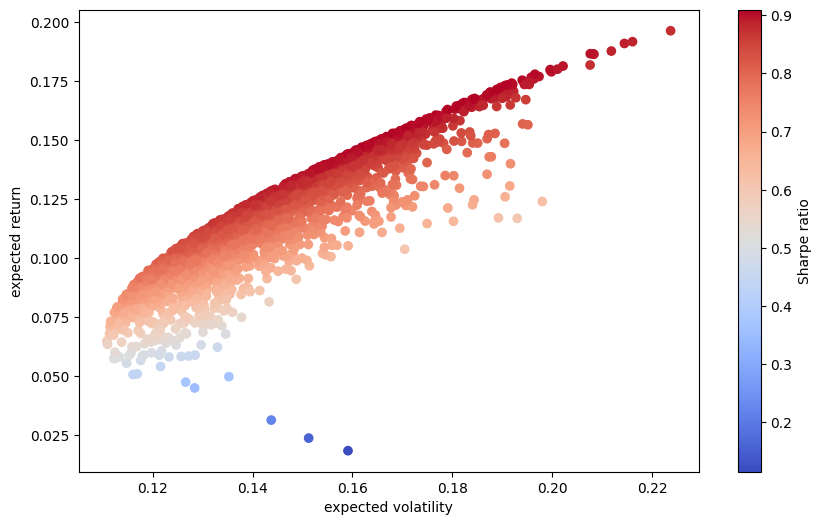

In [14]:
def port_ret(weights) :
    return np.sum(rets.mean() * weights)*252 
def port_vol(weights) :
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
prets = []
pvols = []
for p in range(2500): # (1)
    weights = np.random.random(noa)# (1)
    weights /= np.sum(weights)# (1)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)
# (1) là thực hiện mô phỏng Monte Carlo của trọng số 
# Hình sau sẽ mô tả kết quả của mô phỏng Monte Carlo
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

### <b> <i>Phân tích biểu đồ trên</i></b>
<br>

- <b>1,Expected Volatility(trục x) </b>
    - Đây là độ biến động kỳ vọng của danh mục đầu tư, biểu thị mức độ dao động của lợi nhuận. Độ biến động càng cao cho thấy mức độ rủi ro càng lớn, vì danh mục có thể có lợi nhuận hoặc thua lỗ lớn.

- <b>2,Expected Return(trục y) </b>
    - Đây là lợi nhuận kỳ vọng của danh mục đầu tư, thể hiện lợi nhuận trung bình mà bạn có thể đạt được khi đầu tư theo các trọng số này.

- <b>3, Màu sắc Sharpe</b> 
    - Màu sắc của mỗi điểm biểu diễn tỷ lệ Sharpe của danh mục đầu tư đó. Tỷ lệ Sharpe là một chỉ số đánh giá lợi nhuận của một danh mục đầu tư so với mức độ rủi ro. Tỷ lệ này được tính bằng cách chia lợi nhuận kỳ vọng cho độ biến động kỳ vọng.

    - Những danh mục có tỷ lệ Sharpe cao hơn (màu đỏ) thường là các danh mục có lợi nhuận cao so với rủi ro, trong khi những danh mục có tỷ lệ Sharpe thấp hơn (màu xanh) có lợi nhuận không tương xứng với mức độ rủi ro.

- <b> Những gì biểu đồ cho thấy là :</b>

    - <b> <i> Xu hướng tổng thể</i></b> : Lợi nhuận kỳ vọng có xu hướng tăng khi độ biến động tăng, điều này là hợp lý vì các danh mục có rủi ro cao thường có khả năng mang lại lợi nhuận cao hơn.

    - <b> <i>Danh mục có tỷ lệ Sharpe cao: </i> </b> Các danh mục với tỷ lệ Sharpe cao (màu đỏ) là những danh mục tối ưu hơn về mặt hiệu quả rủi ro, có nghĩa là chúng cung cấp lợi nhuận cao hơn so với rủi ro phải chịu.

    - <b><i>Danh mục có tỷ lệ Sharpe thấp: </i></b> Các danh mục có màu xanh biểu thị tỷ lệ Sharpe thấp, nghĩa là lợi nhuận không xứng đáng với rủi ro phải chịu. Những danh mục này thường nằm ở vùng dưới của biểu đồ, nơi lợi nhuận kỳ vọng thấp nhưng độ biến động vẫn khá cao.

- <b>Kết luận: </b> $=>$ Biểu đồ giúp bạn xác định các danh mục đầu tư tối ưu với rủi ro thấp và lợi nhuận cao (thông qua tỷ lệ Sharpe). Bạn có thể tìm kiếm những điểm có màu đỏ đậm, nơi tỷ lệ Sharpe cao nhất, vì đó là các danh mục đầu tư hiệu quả nhất về mặt lợi nhuận so với rủi ro. 

- Bên cạnh đó: Khi bạn nhìn vào biểu đồ, không phải tất cả các danh mục đầu tư với các trọng số khác nhau đều mang lại kết quả tốt khi xét về lợi nhuận và rủi ro (độ biến động). Ví dụ, với cùng một mức rủi ro cố định là 15%, có nhiều danh mục đầu tư khác nhau nhưng lại cho lợi nhuận khác nhau.Như một nhà đầu tư, bạn sẽ muốn tìm:
    - <b> Danh mục đầu tư mang lại lợi nhuận cao nhất với mức rủi ro cố định </b> hoặc 
    - <b>Danh mục đầu tư có rủi ro thấp nhất với mức lợi nhuận mong muốn. </b>

$=>$ <b> Tập hợp những danh mục đầu tư tốt nhất như vậy tạo thành <i>đường biên hiệu quả (efficient frontier)</i>, nơi mà mỗi danh mục đầu tư được tối ưu về mặt lợi nhuận và rủi ro. </b> (Cái này sẽ tìm hiểu ở phia sau)
</br>


# Optimal Portfolios (Tối ưu hóa danh mục đầu tư)
- Hàm tối ưu hóa này khá tổng quát và cho phép áp dụng các ràng buộc bằng nhau, ràng buộc bất đẳng thức, và các giới hạn số học cho các tham số

- Đầu tiên, việc tối đa hóa tỷ lệ Sharpe được thực hiện. Cụ thể, giá trị âm của tỷ lệ Sharpe được tối thiểu hóa để từ đó tìm ra giá trị tối đa và thành phần danh mục đầu tư tối ưu. Ràng buộc ở đây là tất cả các tham số (trọng số) phải có tổng bằng 1. Điều này có thể được mô tả như sau bằng cách sử dụng các quy ước của hàm minimize(). Các giá trị của tham số (trọng số) cũng bị giới hạn trong khoảng từ 0 đến 1. Các giá trị này được cung cấp cho hàm tối ưu hóa dưới dạng một tuple của các tuple.

<b> Tóm lại:</b> Mục tiêu của tối ưu hóa là tìm ra các <b> <i>trọng số tối ưu (weights) </i> </b> cho danh mục đầu tư sao cho tỷ lệ Sharpe được tối đa hóa, tức là đạt được <b> <i>sự cân bằng tốt nhất </i> </b>giữa lợi nhuận kỳ vọng và độ biến động (rủi ro) .

- Với đoạn code dưới đây, thay vì <b>tối đa hóa tỷ lệ Sharpe</b>, ta sẽ <b>tối thiểu hóa giá trị âm của tỷ lệ Sharpe</b>

In [17]:
import scipy.optimize as sco 
def min_func_sharpe(weights):
    return -port_ret(weights)/port_vol(weights)

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  #Đây là ràng buộc để tổng các x bằng 1 'type': 'eq' chỉ định rằng đây là một ràng buộc kiểu bằng nhau (equality constraint). Nghĩa là hàm ràng buộc phải trả về giá trị bằng 0 để ràng buộc này được thỏa mãn.
bnds = tuple((0, 1) for x in range(noa)) #Giới hạn bnds là một tuple chứa các giới hạn cho mỗi trọng số, yêu cầu chúng nằm trong khoảng từ 0 đến 1. 
eweights = np.array(noa * [1. / noa,]) #Đây là một mảng chứa các trọng số ban đầu, với mỗi trọng số được chia đều cho tất cả các tài sản trong danh mục. Ví dụ, nếu có 4 tài sản trong danh mục, mỗi tài sản sẽ có trọng số ban đầu là 1/4 = 0.25.

min_func_sharpe(eweights)

NameError: name 'min_func_sharpe' is not defined